In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
books=pd.read_csv("books.csv")
users=pd.read_csv("users.csv")
ratings=pd.read_csv("ratings.csv")

C:\Users\kumar\AppData\Local\Temp\ipykernel_1544\2573390583.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv("books.csv")


In [106]:
books.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
60417,0689808526,The Teddy Bear Under the Bed (Real Monsters),Molly Wigand,1996,Simon Spotlight/Nickelodeon,http://images.amazon.com/images/P/0689808526.0...,http://images.amazon.com/images/P/0689808526.0...,http://images.amazon.com/images/P/0689808526.0...
10928,0515128546,Tears of the Moon (Irish Trilogy),Nora Roberts,2000,Jove Books,http://images.amazon.com/images/P/0515128546.0...,http://images.amazon.com/images/P/0515128546.0...,http://images.amazon.com/images/P/0515128546.0...
256088,0688109756,The Kissimmee Kid,Vera Cleaver,1991,Harpercollins Juvenile Books,http://images.amazon.com/images/P/0688109756.0...,http://images.amazon.com/images/P/0688109756.0...,http://images.amazon.com/images/P/0688109756.0...
269137,1582343608,Cathedrals of the Flesh : My Search for the Pe...,Alexia Brue,2004,Bloomsbury USA,http://images.amazon.com/images/P/1582343608.0...,http://images.amazon.com/images/P/1582343608.0...,http://images.amazon.com/images/P/1582343608.0...
181139,0345421175,Animals As Teachers and Healers: True Stories ...,Susan Chernak McElroy,1998,Ballantine Books,http://images.amazon.com/images/P/0345421175.0...,http://images.amazon.com/images/P/0345421175.0...,http://images.amazon.com/images/P/0345421175.0...


In [107]:
users.sample(5)

,User-ID,Location,Age
112951,112952,"san diego, california, usa",NaN
230092,230093,"christchurch, canterbury, new zealand",NaN
221231,221232,"rock hill, south carolina, usa",21.0
139754,139755,"slidell, louisiana, usa",56.0
194446,194447,"needham, massachusetts, usa",42.0


In [108]:
ratings.sample(5)

,User-ID,ISBN,Book-Rating
347998,83109,0140112049,0
958613,231510,0446672211,0
949759,230030,0590624253,0
1089370,261105,2253155039,0
941955,228096,0767914767,0


In [109]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [110]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [111]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [112]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [113]:
books.duplicated().sum()

0

In [114]:
ratings.duplicated().sum()

0

In [115]:
users.duplicated().sum()

0

# books EDA

In [116]:
# Duplicate ISBNs with different titles/authors
dup_isbn = books.groupby("ISBN").agg({"Book-Title": "nunique",
                                      "Book-Author": "nunique"})
print(dup_isbn[(dup_isbn['Book-Title']>1) | (dup_isbn['Book-Author']>1)])



Empty DataFrame
Columns: [Book-Title, Book-Author]
Index: []


In [117]:
# Publication year distribution & cleanup
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'],
                                             errors='coerce')
books['Year-Of-Publication'].describe()

count    271357.000000
mean       1959.760817
std         257.994226
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: Year-Of-Publication, dtype: float64

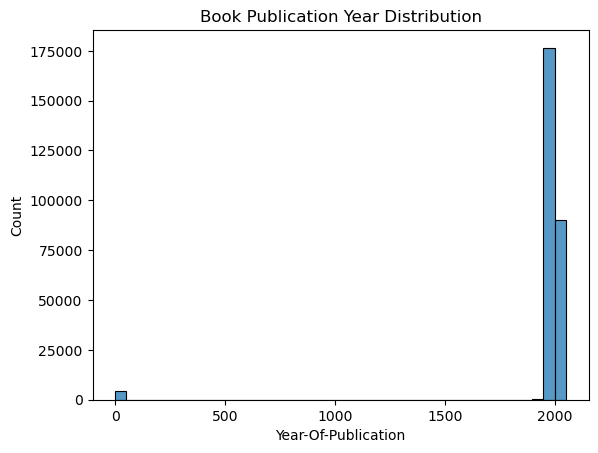

In [118]:
sns.histplot(books['Year-Of-Publication'].dropna(), bins=40)
plt.title("Book Publication Year Distribution")
plt.show()

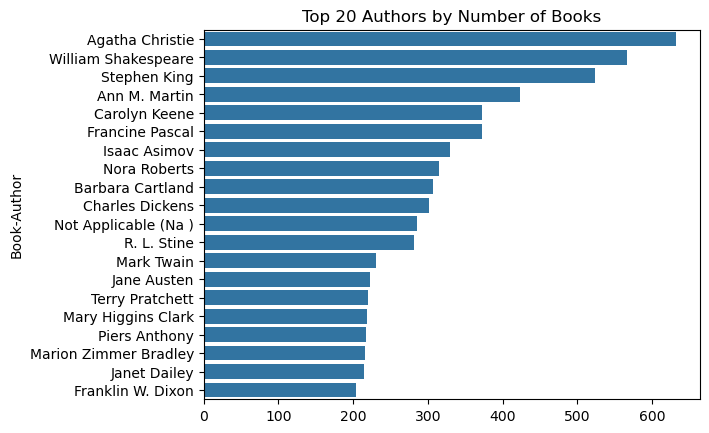

In [119]:
# Top authors & publishers
top_authors = books['Book-Author'].value_counts().head(20)
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title("Top 20 Authors by Number of Books")
plt.show()

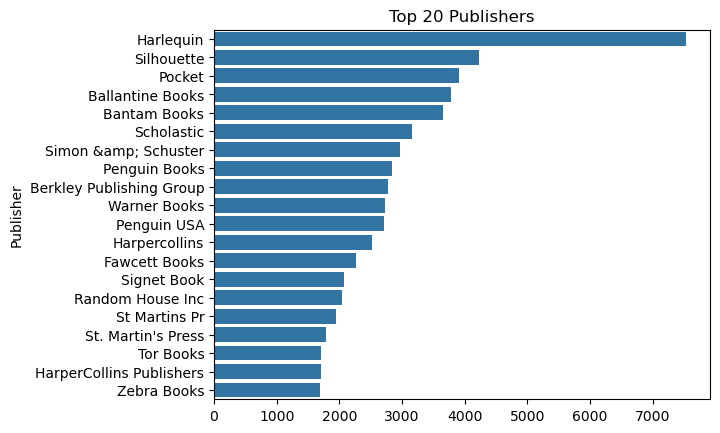

In [120]:
top_publishers = books['Publisher'].value_counts().head(20)
sns.barplot(y=top_publishers.index, x=top_publishers.values)
plt.title("Top 20 Publishers")
plt.show()

In [121]:
# Title length stats
books['title_len'] = books['Book-Title'].str.len()
books['title_len'].describe()

count    271360.000000
mean         37.831169
std          25.211278
min           1.000000
25%          18.000000
50%          32.000000
75%          51.000000
max         256.000000
Name: title_len, dtype: float64

# users EDA

In [122]:
# Age issues & cleanup
users['Age'] = pd.to_numeric(users['Age'], errors='coerce')
print(users['Age'].describe())
# Remove extreme ages
users['Age_clean'] = users['Age'].where(users['Age'].between(5,100))

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64


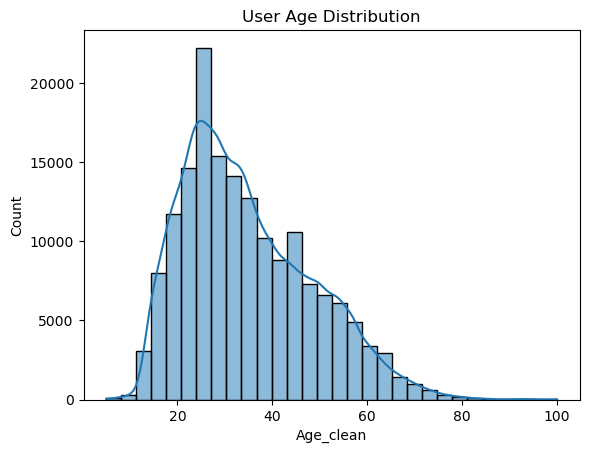

In [123]:
sns.histplot(users['Age_clean'].dropna(), bins=30, kde=True)
plt.title("User Age Distribution")
plt.show()

In [124]:
users['Country'] = users['Location'].apply(lambda x: x.split(',')[-1].strip())

In [125]:
users.head()

,User-ID,Location,Age,Age_clean,Country
0,1,"nyc, new york, usa",NaN,NaN,usa
1,2,"stockton, california, usa",18.0,18.0,usa
2,3,"moscow, yukon territory, russia",NaN,NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,NaN,united kingdom


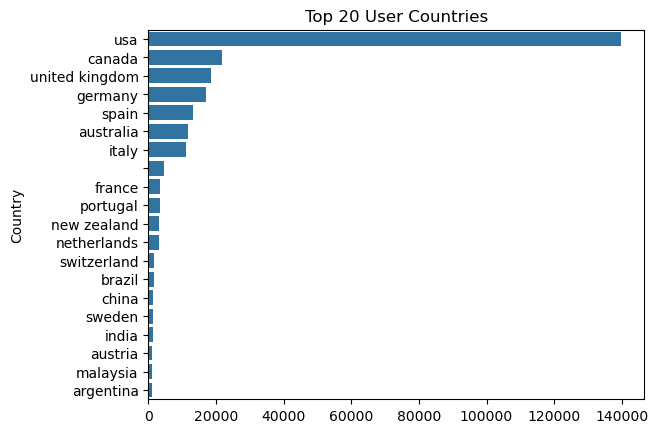

In [126]:
# Country extraction (simple last token heuristic)
users['Country'] = users['Location'].apply(lambda x: x.split(',')[-1].strip())
top_countries = users['Country'].value_counts().head(20)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title("Top 20 User Countries")
plt.show()

# ratings EDA

In [127]:
print(ratings.describe())

            User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01


In [128]:
# Explicit vs implicit (if 0 = implicit)
explicit_pct = (ratings['Book-Rating'] > 0).mean()*100
print("Explicit ratings %: " + str(round(explicit_pct, 2)))


Explicit ratings %: 37.72


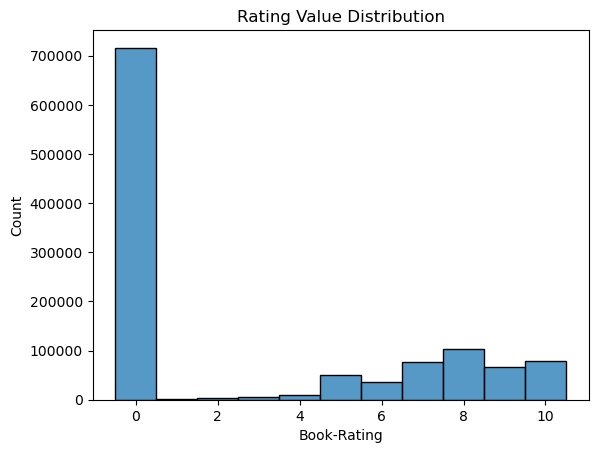

In [129]:
sns.histplot(ratings['Book-Rating'], bins=11, discrete=True)
plt.title("Rating Value Distribution")
plt.show()

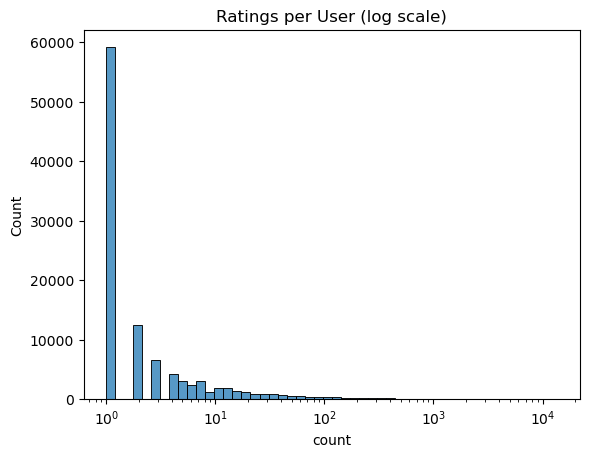

In [130]:
# Ratings per user
user_activity = ratings['User-ID'].value_counts()
sns.histplot(user_activity, bins=50, log_scale=True)
plt.title("Ratings per User (log scale)")
plt.show()

In [131]:
ratings['ISBN'].value_counts()

ISBN
0971880107     2502
0316666343     1295
0385504209      883
0060928336      732
0312195516      723
               ... 
1568656386        1
1568656408        1
1569551553        1
1570081808        1
05162443314       1
Name: count, Length: 340556, dtype: int64

In [133]:
# Sparsity of user–item matrix
num_users = ratings['User-ID'].nunique()
num_books = ratings['ISBN'].nunique()
sparsity = 1 - len(ratings) / (num_users * num_books)
print(f"Matrix sparsity: {sparsity:.4%}")

Matrix sparsity: 99.9968%


# cross EDA

In [134]:
# Merge ratings with books & users
ratings_books = ratings.merge(books[['ISBN','Year-Of-Publication']], on='ISBN', how='left')
ratings_full  = ratings_books.merge(users[['User-ID','Age_clean','Country']], on='User-ID', how='left')

In [135]:
ratings_books.head()

,User-ID,ISBN,Book-Rating,Year-Of-Publication
0,276725,034545104X,0,2002.0
1,276726,0155061224,5,2001.0
2,276727,0446520802,0,1996.0
3,276729,052165615X,3,1999.0
4,276729,0521795028,6,2001.0


In [136]:
ratings_full.head()

,User-ID,ISBN,Book-Rating,Year-Of-Publication,Age_clean,Country
0,276725,034545104X,0,2002.0,NaN,usa
1,276726,0155061224,5,2001.0,NaN,usa
2,276727,0446520802,0,1996.0,16.0,australia
3,276729,052165615X,3,1999.0,16.0,croatia
4,276729,0521795028,6,2001.0,16.0,croatia


C:\Users\kumar\AppData\Local\Temp\ipykernel_1544\1768458559.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratings_full.groupby('AgeGroup')['Book-Rating'].mean().plot(kind='bar')


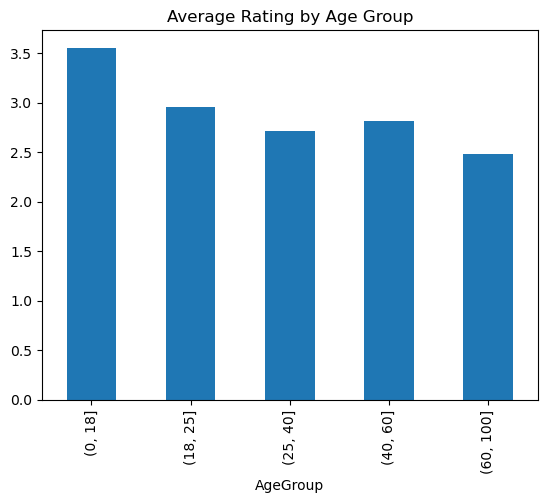

In [137]:
# Avg rating by age group
age_bins = [0,18,25,40,60,100]
ratings_full['AgeGroup'] = pd.cut(ratings_full['Age_clean'], bins=age_bins)
ratings_full.groupby('AgeGroup')['Book-Rating'].mean().plot(kind='bar')
plt.title("Average Rating by Age Group")
plt.show()

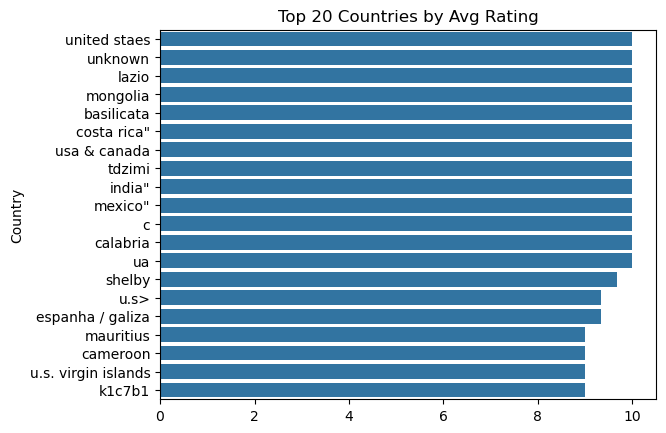

In [138]:
# Avg rating by country (top 20)
country_mean = ratings_full.groupby('Country')['Book-Rating'].mean().sort_values(ascending=False).head(20)
sns.barplot(y=country_mean.index, x=country_mean.values)
plt.title("Top 20 Countries by Avg Rating")
plt.show()

# Popularity based recommendation system

In [142]:
ratings_with_name= ratings.merge(books,on='ISBN')

In [143]:
num_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].count().reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [144]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [145]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [146]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)
popular_df

,Book-Title,num_ratings,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [148]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [149]:
popular_df.shape

(50, 5)

In [150]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

# Collaborative Filtering Based Recommender System

In [151]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [152]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [153]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [154]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [155]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [156]:
pt.fillna(0,inplace=True)

In [157]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
pt.index[545]

"The Handmaid's Tale"

In [159]:
from sklearn.metrics.pairwise import cosine_similarity

In [167]:
cosine_similarity(pt)

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [160]:
similarity_scores = cosine_similarity(pt)

In [161]:
similarity_scores.shape

(706, 706)

In [163]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [189]:
index=np.where(pt.index=='1984')[0][0]
sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]

[(47, 0.2702651417103732),
 (545, 0.2639619371123497),
 (82, 0.23669374347400993),
 (634, 0.23299389358170394)]

In [186]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [165]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [166]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))